In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Part 1 Data Preprocessing

### importing the data

In [49]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [50]:
dataset_train.shape

(1258, 6)

In [51]:
training_set = dataset_train.iloc[:,1:2].values

In [52]:
from sklearn.preprocessing import MinMaxScaler

### feature scaling

In [53]:
scaler = MinMaxScaler(feature_range=(0,1))
training_set_scaled = scaler.fit_transform(training_set)

### creating a data structure with 60 timesteps and 1 output

In [54]:
X_train = []
y_train = []

for i in range(60,1258):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train,y_train = np.array(X_train),np.array(y_train)

In [55]:
X_train[0:5]

array([[0.08581368, 0.09701243, 0.09433366, 0.09156187, 0.07984225,
        0.0643277 , 0.0585423 , 0.06568569, 0.06109085, 0.06639259,
        0.0614257 , 0.07474514, 0.02797827, 0.02379269, 0.02409033,
        0.0159238 , 0.01078949, 0.00967334, 0.01642607, 0.02100231,
        0.02280676, 0.02273235, 0.02810849, 0.03212665, 0.0433812 ,
        0.04475779, 0.04790163, 0.0440695 , 0.04648783, 0.04745517,
        0.04873875, 0.03936305, 0.04137213, 0.04034898, 0.04784582,
        0.04325099, 0.04356723, 0.04286033, 0.04602277, 0.05398467,
        0.05738894, 0.05714711, 0.05569611, 0.04421832, 0.04514845,
        0.04605997, 0.04412531, 0.03675869, 0.04486941, 0.05065481,
        0.05214302, 0.05612397, 0.05818885, 0.06540665, 0.06882953,
        0.07243843, 0.07993526, 0.07846566, 0.08034452, 0.08497656],
       [0.09701243, 0.09433366, 0.09156187, 0.07984225, 0.0643277 ,
        0.0585423 , 0.06568569, 0.06109085, 0.06639259, 0.0614257 ,
        0.07474514, 0.02797827, 0.02379269, 0.0

In [56]:
y_train[0:5]

array([0.08627874, 0.08471612, 0.07454052, 0.07883771, 0.07238262])

### Reshaping

In [57]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

# Part 2 Building the RNN model

In [58]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Intializing the Keras Libaries and package

In [59]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularization

In [60]:
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

### Adding the second LSTM Layer and some Dropout regularization

In [61]:
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

### Adding the third LSTM Layer and some Dropout regularization

In [62]:
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

### Adding the fourth LSTM Layer and some Dropout regularization

In [63]:
regressor.add(LSTM(units=50,return_sequences=False))
regressor.add(Dropout(0.2))

### Adding the Output Layer

In [64]:
regressor.add(Dense(units=1))

### Compiling the RNN model

In [65]:
regressor.compile(optimizer='adam',loss = 'mean_squared_error')

### Fitting the RNN model

In [66]:
regressor.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
38/38 [==============================] - 6s 38ms/step - loss: 0.0298
Epoch 2/100
38/38 [==============================] - 1s 38ms/step - loss: 0.0063
Epoch 3/100
38/38 [==============================] - 1s 37ms/step - loss: 0.0053
Epoch 4/100
38/38 [==============================] - 1s 38ms/step - loss: 0.0052
Epoch 5/100
38/38 [==============================] - 1s 38ms/step - loss: 0.0052
Epoch 6/100
38/38 [==============================] - 1s 37ms/step - loss: 0.0046
Epoch 7/100
38/38 [==============================] - 1s 36ms/step - loss: 0.0046
Epoch 8/100
38/38 [==============================] - 1s 36ms/step - loss: 0.0043
Epoch 9/100
38/38 [==============================] - 1s 37ms/step - loss: 0.0042
Epoch 10/100
38/38 [==============================] - 1s 36ms/step - loss: 0.0041
Epoch 11/100
38/38 [==============================] - 1s 37ms/step - loss: 0.0049
Epoch 12/100
38/38 [==============================] - 1s 37ms/step - loss: 0.0046
Epoch 13/100
38/38 [=====

# Part 3 Predictions and visualising the result

### Getting the real stock of 2017

In [67]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
dataset_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [68]:
dataset_test.shape

(20, 6)

In [69]:
real_stock_price = dataset_test.iloc[:, 1:2].values

In [70]:
# Getting the predicted stock price of 2017

In [71]:
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)
dataset_total.shape

(1278,)

In [72]:
inputs = dataset_total[len(dataset_total)-len(dataset_test) -60:].values

C:\Users\Abhinav94\AppData\Local\Temp\ipykernel_17952\2645378126.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  inputs = dataset_total[len(dataset_total)-len(dataset_test) -60:].values


In [73]:
inputs

array([779.  , 779.66, 777.71, 786.66, 783.76, 781.22, 781.65, 779.8 ,
       787.85, 798.24, 803.3 , 795.  , 804.9 , 816.68, 806.34, 801.  ,
       808.35, 795.47, 782.89, 778.2 , 767.25, 750.66, 774.5 , 783.4 ,
       779.94, 791.17, 756.54, 755.6 , 746.97, 755.2 , 766.92, 771.37,
       762.61, 772.63, 767.73, 764.26, 760.  , 771.53, 770.07, 757.44,
       744.59, 757.71, 764.73, 761.  , 772.48, 780.  , 785.04, 793.9 ,
       797.4 , 797.34, 800.4 , 790.22, 796.76, 795.84, 792.36, 790.9 ,
       790.68, 793.7 , 783.33, 782.75, 778.81, 788.36, 786.08, 795.26,
       806.4 , 807.86, 805.  , 807.14, 807.48, 807.08, 805.81, 805.12,
       806.91, 807.25, 822.3 , 829.62, 837.81, 834.71, 814.66, 796.86])

In [74]:
inputs = inputs.reshape(-1,1)
inputs_scaled = scaler.transform(inputs)

In [75]:
X_test = []
y_test = []

for i in range(60,80):
    X_test.append(inputs_scaled[i-60:i,0])
    y_test.append(inputs_scaled[i,0])
X_test,y_test = np.array(X_test),np.array(y_test)

In [76]:
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test

array([[[0.9299055 ],
        [0.93113327],
        [0.92750577],
        ...,
        [0.95725128],
        [0.93796041],
        [0.93688146]],

       [[0.93113327],
        [0.92750577],
        [0.94415507],
        ...,
        [0.93796041],
        [0.93688146],
        [0.92955205]],

       [[0.92750577],
        [0.94415507],
        [0.93876032],
        ...,
        [0.93688146],
        [0.92955205],
        [0.94731751]],

       ...,

       [[0.96054394],
        [0.9371419 ],
        [0.92841729],
        ...,
        [1.01045465],
        [1.02407173],
        [1.03930724]],

       [[0.9371419 ],
        [0.92841729],
        [0.90804747],
        ...,
        [1.02407173],
        [1.03930724],
        [1.03354044]],

       [[0.92841729],
        [0.90804747],
        [0.8771858 ],
        ...,
        [1.03930724],
        [1.03354044],
        [0.99624228]]])

In [77]:
predicted_stock_price = regressor.predict(X_test)

1/1 [==============================] - 1s 822ms/step


In [78]:
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
predicted_stock_price

array([[775.55255],
       [772.8079 ],
       [773.03357],
       [774.4697 ],
       [777.87476],
       [783.8326 ],
       [789.3061 ],
       [791.5435 ],
       [791.8081 ],
       [791.39417],
       [790.93756],
       [790.48096],
       [790.1476 ],
       [790.5734 ],
       [791.4851 ],
       [796.077  ],
       [803.03033],
       [810.48413],
       [814.47534],
       [810.2007 ]], dtype=float32)

# Visualising the result

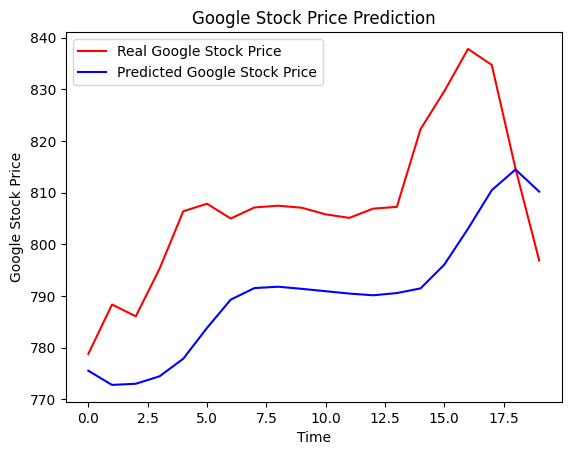

In [80]:
plt.plot(real_stock_price,color='red',label='Real Google Stock Price')
plt.plot(predicted_stock_price,color='blue',label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()